# Perfectly competitive market
The supply is described by $ p_s = 25 + 1.5q $ and the demand is $ p_d = 200 - 2q $. Plot the plots, solution for perfect competition without, with ad valorem and per unit tax. Calculate consumer surplus, producer surplus and deadweight loss for all three cases.

In [1]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

In [2]:
q_d, q_s, q = symbols("q_d, q_s, q")

In [3]:
#inverse demand function
def p_d_func(q_d):
    return 200 - 2*q_d

#inverse supply function
def p_s_func(q_s):
    return 25 + 1.5*q_s

## PLOT

In [4]:
%%capture
demand_plot = plot(p_d_func(q), (q, 0, 120), ylim=(0, 225), line_color='tomato', ylabel='p')
supply_plot = plot(p_s_func(q), (q, 0, 120), ylim=(0, 225), line_color='cornflowerblue')

demand_plot.extend(supply_plot)

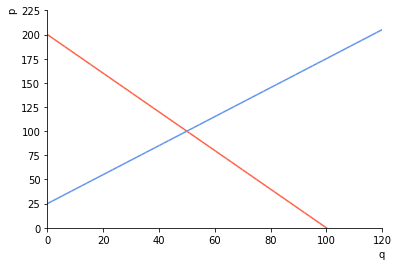

In [5]:
demand_plot.show()

#### NO TAX
Where do demand and supply cross?

In [6]:
q_star = solve(p_d_func(q)-p_s_func(q),q)[0]
p_star = p_d_func(q_star)

In [7]:
q_star, p_star

#### AD VALOREM TAX

In [8]:
t = symbols("t") # here is is enough to set the tax to a number and calculate numbers instead of functions of t
p_d, p_s = symbols("p_d, p_s")

In [9]:
# demand function
def q_d_func(p_d):
    return solve(p_d_func(q_d)-p_d, q_d)[0]

# supply function
def q_s_func(p_s):
    return solve(p_s_func(q_s)-p_s, q_s)[0]

In [10]:
# relation between demand price and supply price
price_eq_advalorem = p_d - (1+t)*p_s

# equality between quantity of demand and supply
quantity_eq = q_d_func(p_d)-q_s_func(p_s)

In [11]:
price_eq_advalorem
quantity_eq

In [12]:
p_tax = solve((price_eq_advalorem, quantity_eq),(p_s, p_d))
p_d_tax_av = p_tax[p_d]
p_s_tax_av = p_tax[p_s]
q_tax_av = q_d_func(p_d_tax_av)

'demand price with ad valorem tax: '

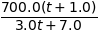

'supply price with ad valorem tax: '

'quantity'

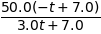

In [13]:
'demand price with ad valorem tax: '
p_d_tax_av
'supply price with ad valorem tax: '
p_s_tax_av
'quantity'
q_tax_av

#### PER UNIT TAX

In [14]:
price_eq_perunit = - p_d + p_s + t
quantity_eq = q_d_func(p_d)-q_s_func(p_s)

In [15]:
p_tax = solve((price_eq_perunit, quantity_eq),(p_s, p_d))
p_d_tax_pu = p_tax[p_d]
p_s_tax_pu = p_tax[p_s]
q_tax_pu = q_d_func(p_d_tax_pu)

In [16]:
'demand price with per unit tax: '
p_d_tax_pu
'supply price with per unit tax: '
p_s_tax_pu
'quantity'
q_tax_pu

'demand price with per unit tax: '

'supply price with per unit tax: '

'quantity'

##  CONSUMER SURPLUS, PRODUCER SURPLUS, DEADWEIGHT LOSS

In [17]:
q, q_x = symbols("q, q_x")

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4cuzAtpXewEiDBNO-WULx0Tqc5z3KtPPQDZuo-Xu9lOIvefasyg'>

In [18]:
# Consumer surplus - area below demand function and above consumer price
def CS_func(q):
    return integrate(p_d_func(q_x), (q_x, 0, q)) - p_d_func(q)*q

# Producer surplus - area above supply function and below supply price
def PS_func(q):
    return p_s_func(q)*q - integrate(p_s_func(q_x),(q_x,0,q))

# Deadweight loss - area between demand and supply, with prices higher than supply and lower than demand
# also sum of differences between consumer surplus and producer surplus compared to perfect competition solution

def DL_func(q):
    return integrate(p_d_func(q_x), (q_x, q, q_star)) - integrate(p_s_func(q_x),(q_x,q,q_star))
# the same as:
#     return CS_func(q_star) - CS_func(q) + PS_func(q_star) - PS_func(q)

#### NO TAX

In [19]:
CS = CS_func(q_star)
PS = PS_func(q_star)
# deadweight loss for perfect competition with no tax is always 0
DL = DL_func(q_star)
CS
PS
DL

#### AD VALOREM TAX

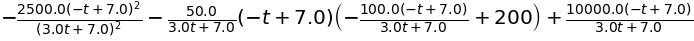

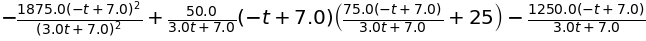

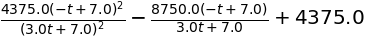

In [20]:
CS = CS_func(q_tax_av)
PS = PS_func(q_tax_av)
DL = DL_func(q_tax_av)
CS
PS
DL

#### PER UNIT TAX

In [21]:
CS = CS_func(q_tax_pu)
PS = PS_func(q_tax_pu)
DL = DL_func(q_tax_pu)
CS
PS
DL